In [1]:
import numpy as np
import matplotlib.pyplot as plt

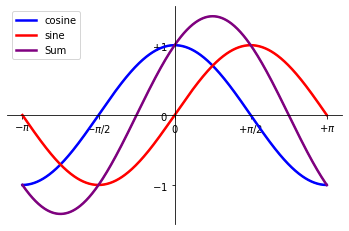

In [2]:
X = np.linspace(-np.pi, np.pi, 512)
C, S = np.cos(X), np.sin(X)

plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
          [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.yticks([-2,-1, 0, +1,+2],
          [r'$-2$',r'$-1$', r'$0$', r'$+1$',r'$+2$'])

Sum = C + S
plt.plot(X, C)
plt.plot(X, S)
plt.plot(X, Sum)
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosine")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-", label="sine")
plt.plot(X, Sum, color="purple",  linewidth=2.5, linestyle="-", label="Sum")

plt.legend(loc='upper left')

ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
plt.show()

In [12]:
class WaveSource:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def get_entry(self):
        return "X:{0} Y: {1}".format(self.x, self.y)

X:0.0 Y: 0
X:1.5707963267948966 Y: 0
X:3.141592653589793 Y: 0
X:4.71238898038469 Y: 0
X:6.283185307179586 Y: 0


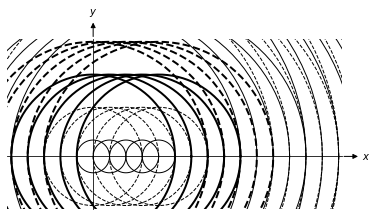

In [41]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.gca()

#-- Set axis spines at 0
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')

#-- Hide the other spines...
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

#-- Decorate the spines
arrow_length = 20 # In points

#-- X-axis arrow
ax.annotate('$x$', xy=(1, 0), xycoords=('axes fraction', 'data'), 
            xytext=(arrow_length, 0), textcoords='offset points',
            ha='left', va='center',
            arrowprops=dict(arrowstyle='<|-', fc='black'))

#-- Y-axis arrow
ax.annotate('$y$', xy=(0, 1), xycoords=('data', 'axes fraction'), 
            xytext=(0, arrow_length), textcoords='offset points',
            ha='center', va='bottom',
            arrowprops=dict(arrowstyle='<|-', fc='black'))

#-- Plot
ax.axis([-5.25*np.pi/2, 7.6*np.pi, -1.6*np.pi, 3.6*np.pi])
ax.grid(False)
ax.set_aspect(1)


# Turn off ticks
ax.set_yticks([])
ax.set_xticks([])

# Turn off tick labels
ax.set_yticklabels([])
ax.set_xticklabels([])

#-- Function
wave_sources = []
for i in np.linspace(0, 1 * 2*np.pi, 5):
    wave_sources.append(WaveSource(x=i, y=0))

slices = 100
for source in wave_sources:
    print(source.get_entry())
    for wave in range(1,5):
        # create our theta from 0 to 360 degrees into slices
        theta = np.linspace(0, 2*np.pi, slices)

        r_hi = wave*2*np.pi - (3*np.pi/2)
        r_lo = wave*2*np.pi - (np.pi/2)

        x_hi = r_hi*np.cos(theta)
        y_hi = r_hi*np.sin(theta)

        x_lo = r_lo*np.cos(theta)
        y_lo = r_lo*np.sin(theta)
        
        
        x_hi = x_hi + source.x
        y_hi = y_hi + source.y
        
        x_lo = x_lo + source.x
        y_lo = y_lo + source.y
        

        if wave==2: 
            ax.plot(x_hi, y_hi, 'k-', linewidth=2)
            ax.plot(x_lo, y_lo, 'k--', linewidth=2)
        else:
            ax.plot(x_hi, y_hi, 'k-', linewidth=1)
            ax.plot(x_lo, y_lo, 'k--', linewidth=1)


plt.show()